In [ ]:
!pip install gdown
!pip install patool


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gdown
import pandas as pd
import numpy as np
import json
from IPython import display
from urllib.request import urlopen
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import plotly.express as px 
import dataframe_image as dfi



# Allow multiple output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def download_from_gdrive(url, output):
  gdown.download(url, output, quiet=False)
  get_ipython().system_raw("unrar x /content/" + output)



In [ ]:
# Dowload and unpack dataset
url = 'https://drive.google.com/u/0/uc?id=1MXUQ39Two6nNBIZNwApqz9iEi00g6i8G&export=download'
download_from_gdrive(url, '05_06_17_VSE.rar')

Downloading...
From: https://drive.google.com/u/0/uc?id=1MXUQ39Two6nNBIZNwApqz9iEi00g6i8G&export=download
To: /content/05_06_17_VSE.rar
100%|██████████| 23.2M/23.2M [00:00<00:00, 96.8MB/s]


In [ ]:
# Style

colormap = 'PuBuGn'
colors = ["#016450","#02818a","#3690c0","#67a9cf",
"#a6bddb","#d0d1e6","#ece2f0","#fff7fb"] #PuBuGn but discrete

def value_counts_to_df(value_counts):
  return pd.DataFrame({'category': value_counts.value_counts().index, 'count': value_counts.value_counts().values})


In [ ]:
df = pd.read_csv('!05&06_17_VSE.csv', encoding = "cp1251", sep=';')

In [ ]:
# pd.set_option('display.max_columns', None)
df.head()


,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.05.2017 0:03,03.05.2017 0:00,4513479_TR,Доставлен,761,761,Магазины,Безналичная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,...,49,2,1,30.04.2017 0:00,55574954-50515053535277,107117_ku13@mail.ru,Марина,ID10020734553,0,NaN
1,01.05.2017 10:18,03.05.2017 0:00,4513492_TR,К отгрузке,1 878,1 878,Pick point,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,180,1,1,30.04.2017 0:00,55574851-50484949535070,121117_yu21@yandex.ru,Гость,IDL00035982755,0,NaN
2,01.05.2017 0:03,08.05.2017 0:00,4513499_TR,Расформирован ПВЗ,1 374,1 374,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,7,0,30.04.2017 0:00,55575054-55515752524870,guest_103117_gu28@workmail.ru,Гость,IDL00038110048,0,NaN
3,01.05.2017 0:03,08.05.2017 0:00,4513499_TR,Расформирован ПВЗ,1 374,1 374,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,5,0,30.04.2017 0:00,55575054-55515752524870,guest_103117_gu28@workmail.ru,Гость,ID000so-4578957,0,NaN
4,01.05.2017 0:03,08.05.2017 0:00,4513499_TR,Расформирован ПВЗ,1 374,1 374,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,4,0,30.04.2017 0:00,55575054-55515752524870,guest_103117_gu28@workmail.ru,Гость,IDL00016235553,0,NaN


In [ ]:
df.shape

(730558, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730558 entries, 0 to 730557
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Дата                      730558 non-null  object
 1   ДатаДоставки              730161 non-null  object
 2   НомерЗаказаНаСайте        730558 non-null  object
 3   НовыйСтатус               730558 non-null  object
 4   СуммаЗаказаНаСайте        730558 non-null  object
 5   СуммаДокумента            730558 non-null  object
 6   МетодДоставки             730556 non-null  object
 7   ФормаОплаты               730556 non-null  object
 8   Регион                    725426 non-null  object
 9   Группа2                   631034 non-null  object
 10  Группа3                   631034 non-null  object
 11  Группа4                   602722 non-null  object
 12  Тип                       730558 non-null  object
 13  Номенклатура              730558 non-null  object
 14  ТипТ

In [ ]:
df

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.05.2017 0:03,03.05.2017 0:00,4513479_TR,Доставлен,761,761,Магазины,Безналичная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,...,49,2,1,30.04.2017 0:00,55574954-50515053535277,107117_ku13@mail.ru,Марина,ID10020734553,0,NaN
1,01.05.2017 10:18,03.05.2017 0:00,4513492_TR,К отгрузке,1 878,1 878,Pick point,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,180,1,1,30.04.2017 0:00,55574851-50484949535070,121117_yu21@yandex.ru,Гость,IDL00035982755,0,NaN
2,01.05.2017 0:03,08.05.2017 0:00,4513499_TR,Расформирован ПВЗ,1 374,1 374,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,7,0,30.04.2017 0:00,55575054-55515752524870,guest_103117_gu28@workmail.ru,Гость,IDL00038110048,0,NaN
3,01.05.2017 0:03,08.05.2017 0:00,4513499_TR,Расформирован ПВЗ,1 374,1 374,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,5,0,30.04.2017 0:00,55575054-55515752524870,guest_103117_gu28@workmail.ru,Гость,ID000so-4578957,0,NaN
4,01.05.2017 0:03,08.05.2017 0:00,4513499_TR,Расформирован ПВЗ,1 374,1 374,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,4,0,30.04.2017 0:00,55575054-55515752524870,guest_103117_gu28@workmail.ru,Гость,IDL00016235553,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730553,30.06.2017 23:08,04.07.2017 0:00,5031550_TR,Расформирован ПВЗ,3 723,"3 723,01",Магазины,Безналичная,Подольск (Московская область район),ДЕТСКОЕ ПИТАНИЕ,...,49,6,0,30.06.2017 0:00,55574953-50495349574974,97117_au14@bk.ru,Андрей,ID10018195452,0,NaN
730554,30.06.2017 23:08,04.07.2017 0:00,5031550_TR,Расформирован ПВЗ,3 723,"3 723,01",Магазины,Безналичная,Подольск (Московская область район),ДЕТСКОЕ ПИТАНИЕ,...,49,5,0,30.06.2017 0:00,55574953-50495349574974,97117_au14@bk.ru,Андрей,ID10019304654,0,NaN
730555,30.06.2017 23:13,11.07.2017 0:00,5031575_TR,К отгрузке,6 690,6 690,Pick point,Безналичная,Санкт-Петербург,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,370,1,1,30.06.2017 0:00,55575348-48504953555074,117117_uu16@yandex.ru,Гость,IDL00051785149,0,NaN
730556,30.06.2017 23:58,06.07.2017 0:00,5031783_TR,Доставлен,2 819,2 819,Магазины,Безналичная,Нижний Новгород,ДЕТСКОЕ ПИТАНИЕ,...,99,2,4,30.06.2017 0:00,55575450-53495456535575,121109_ym20@gmail.com,Мария,ID000sm-0652654,0,NaN


First, it is needed to find out the number and ratio of unique values, empty values, zeros, data types.

In [ ]:
df_stat = pd.concat(
    {
        "# of NaN's": df.isna().sum(),
        "% of NaN's": round(df.isna().sum() / df.shape[0] * 100, 2),
        "# of zeros": df.isin([0]).sum(),
        "% of zeros": round(df.isin([0]).sum() / df.shape[0] * 100, 2),
        "# of Unique Values": df.nunique(),
        "Data Type": df.dtypes

    }, axis=1)



In [ ]:
df_stat.sort_values('# of NaN\'s',ascending=False).style.background_gradient(cmap = colormap)

,# of NaN's,% of NaN's,# of zeros,% of zeros,# of Unique Values,Data Type
МагазинЗаказа,725429,99.300000,0,0.000000,89,object
ПричинаОтмены,658541,90.140000,0,0.000000,31,object
ПВЗ_код,208661,28.560000,0,0.000000,11,object
Группа4,127836,17.500000,0,0.000000,429,object
Маржа,102523,14.030000,0,0.000000,44468,object
ЦенаЗакупки,102523,14.030000,0,0.000000,25188,object
Группа2,99524,13.620000,0,0.000000,13,object
Группа3,99524,13.620000,0,0.000000,96,object
ТипТовара,99524,13.620000,0,0.000000,2,object
ЭлектроннаяПочта_new,12586,1.720000,0,0.000000,6255,object


To identify a customer the phone number is selected since there are no NaN values in the dataset. On contrast, there are 1.72% of bills without specified emails.

In [ ]:
# Remove unnecessary columns
df.drop(['ПВЗ_код','ID_SKU','ЭлектроннаяПочта_new', 'Клиент', 'ФормаОплаты'],axis=1, inplace=True)

In [ ]:
# Since only delivered orders should be taken into account in the analysis, the reasons of reject are omitted
df.drop(['ПричинаОтмены'],axis=1, inplace=True)

In [ ]:
df.shape

(730558, 32)

To work with numeric variables properly, the columns are formated to Pythonic representation of numbers and dates

In [ ]:
# Set the date format
format_date = lambda x:pd.to_datetime(x.str.replace(' 0',' 00'), format="%d.%m.%Y %H:%M")
df['Дата'] = format_date(df['Дата'])
df['ДатаДоставки'] = format_date(df['ДатаДоставки'])
df['ДатаЗаказаНаСайте'] = format_date(df['ДатаЗаказаНаСайте'])




In [ ]:
df['ГодДаты'] = pd.DatetimeIndex(df['Дата']).year
df['МесяцДаты'] = pd.DatetimeIndex(df['Дата']).month
df['ДеньНеделиДаты'] = pd.DatetimeIndex(df['Дата']).day_of_week+1
df['ДеньДаты'] = pd.DatetimeIndex(df['Дата']).day
df['ВремяОкруглДаты'] = pd.DatetimeIndex(df['Дата']).floor('H').time

In [ ]:
# Format the price
format_money = lambda x:x.str.replace(',','.').str.replace(' ','').astype(float)
df['Цена'] = format_money(df['Цена'])
df['ЦенаЗакупки'] = format_money(df['ЦенаЗакупки'])
df['СуммаДокумента'] = format_money(df['СуммаДокумента'])
df['СуммаЗаказаНаСайте'] = format_money(df['СуммаЗаказаНаСайте'])
df['СуммаСтроки'] = format_money(df['СуммаСтроки'])
df['Маржа'] = format_money(df['Маржа'])
df['СуммаУслуг'] = format_money(df['СуммаУслуг'])
df['СуммаДоставки'] = format_money(df['СуммаДоставки'])

There are two similar columns "Статус" and "НовыйСтатус" and are compared in the next cells

In [ ]:
df['Статус'].unique()

array(['Доставлен', 'Отменен', 'Возврат', 'В процессе', 'Не определен'],
      dtype=object)

In [ ]:
df['НовыйСтатус'].unique()

array(['Доставлен', 'К отгрузке', 'Расформирован ПВЗ', 'Возврат из ПВЗ',
       'Частичный возврат', 'Принят в ПВЗ', 'Возврат', 'Отменен',
       'Отменяется', 'Скомплектован Регион', 'В резерве',
       'Отправлен в ПВЗ', 'Передан в Регион', 'К отправке в Регион'],
      dtype=object)

In [ ]:
df.loc[df['НовыйСтатус'] != df['Статус']]

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ГородМагазина,МагазинЗаказа,ГодДаты,МесяцДаты,ДеньНеделиДаты,ДеньДаты,ВремяОкруглДаты
1,2017-05-01 10:18:00,2017-05-03,4513492_TR,К отгрузке,1878.0,1878.00,Pick point,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),жилеты,ОДЕЖДА,"LEADER KIDS, ЖИЛЕТ Тигр, (син), р.140",МГТ,Нет,1,499.0,499.0,300.00,5,2 017,Доставлен,Москва,199.00,180.0,180.0,1,1,2017-04-30,55574851-50484949535070,0,NaN,2017,5,1,1,10:00:00
2,2017-05-01 00:03:00,2017-05-08,4513499_TR,Расформирован ПВЗ,1374.0,1374.00,Магазины,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ","ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",головные уборы,ОДЕЖДА,"LEADER KIDS, КОСЫНКА (набивка), р. 44",МГТ,Нет,1,120.0,120.0,47.50,5,2 017,Отменен,Москва,72.50,49.0,49.0,7,0,2017-04-30,55575054-55515752524870,0,NaN,2017,5,1,1,00:00:00
3,2017-05-01 00:03:00,2017-05-08,4513499_TR,Расформирован ПВЗ,1374.0,1374.00,Магазины,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"ГАМЕКС, БОДИ Lapka, (гол), р. 68, Польша",МГТ,Нет,1,279.0,279.0,151.23,5,2 017,Отменен,Москва,127.77,49.0,49.0,5,0,2017-04-30,55575054-55515752524870,0,NaN,2017,5,1,1,00:00:00
4,2017-05-01 00:03:00,2017-05-08,4513499_TR,Расформирован ПВЗ,1374.0,1374.00,Магазины,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"AGA, БОДИ (роз), р. 68, Польша",МГТ,Нет,1,279.0,279.0,142.22,5,2 017,Отменен,Москва,136.78,49.0,49.0,4,0,2017-04-30,55575054-55515752524870,0,NaN,2017,5,1,1,00:00:00
5,2017-05-01 00:03:00,2017-05-08,4513499_TR,Расформирован ПВЗ,1374.0,1374.00,Магазины,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ","ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",головные уборы,ОДЕЖДА,"LEADER KIDS, КОСЫНКА (набивка), р. 44",МГТ,Нет,1,120.0,120.0,47.50,5,2 017,Отменен,Москва,72.50,49.0,49.0,6,0,2017-04-30,55575054-55515752524870,0,NaN,2017,5,1,1,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730547,2017-06-30 22:40:00,2017-07-12,5031377_TR,Возврат из ПВЗ,3265.0,3265.00,Магазины,Пермь,ДЕТСКОЕ ПИТАНИЕ,КАШИ,каши натуральные,ППКП,"РЕМЕДИА-РУС, КАША многозерновая, (200 г)",МГТ,Нет,3,279.0,837.0,276.17,6,2 017,Возврат,Регионы,8.49,99.0,99.0,6,0,2017-06-30,55574854-56555654485378,0,NaN,2017,6,5,30,22:00:00
730552,2017-06-30 23:08:00,2017-07-04,5031550_TR,Расформирован ПВЗ,3723.0,3723.01,Магазины,Подольск (Московская область район),ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,СОСКИ/ПУСТЫШКИ,соски,ППКП,"НУК, СОСКА для чая (латекс), с возд. клап., с ...",МГТ,Нет,2,108.0,216.0,81.04,6,2 017,Отменен,МО,53.92,49.0,49.0,3,0,2017-06-30,55574953-50495349574974,0,NaN,2017,6,5,30,23:00:00
730553,2017-06-30 23:08:00,2017-07-04,5031550_TR,Расформирован ПВЗ,3723.0,3723.01,Магазины,Подольск (Московская область район),ДЕТСКОЕ ПИТАНИЕ,ЗАМЕНИТЕЛИ МОЛОКА,NaN,ППКП,"НУТРИЛАК, ЗАМЕНИТЕЛЬ молока кисломолочный, с р...",МГТ,Нет,2,343.0,686.0,326.21,6,2 017,Отменен,МО,33.58,49.0,49.0,6,0,2017-06-30,55574953-50495349574974,0,NaN,2017,6,5,30,23:00:00
730554,2017-06-30 23:08:00,2017-07-04,5031550_TR,Расформирован ПВЗ,3723.0,3723.01,Магазины,Подольск (Московская область район),ДЕТСКОЕ ПИТАНИЕ,ЗАМЕНИТЕЛИ МОЛОКА,NaN,ППКП,"НУТРИЛАК ПРЕМИУМ, ЗАМЕНИТЕЛЬ молока с пребиоти...",МГТ,Нет,3,255.0,765.0,199.43,6,2 017,Отменен,МО,166.71,49.0,49.0,5,0,2017-06-30,55574953-50495349574974,0,NaN,2017,6,5,30,23:00:00


In the analysis, the column "Статус" was chosen as the primary indicator of order status instead of "НовыйСтатус" due to its higher representation of "delivered" orders. This selection was made considering the dataset's origin from multiple databases, which resulted in discrepancies between the two columns. Notably, "НовыйСтатус" did not consistently reflect the actual new status, as evidenced by instances where "Статус" indicated an order being delivered while "НовыйСтатус" implied that the order was just being prepared for delivery. Hence, to ensure accuracy and consistency, the "Статус" column was utilized as the key identifier for order status within the analysis.

In [ ]:
df['НовыйСтатус'].value_counts()

Доставлен               294515
К отгрузке              197546
Возврат из ПВЗ          130255
Отменен                  65765
Частичный возврат        22210
Расформирован ПВЗ         8371
Принят в ПВЗ              5321
Скомплектован Регион      3108
Отменяется                2878
В резерве                  369
Возврат                    187
Отправлен в ПВЗ             26
Передан в Регион             4
К отправке в Регион          3
Name: НовыйСтатус, dtype: int64

In [ ]:
df['Статус'].value_counts()

Доставлен       492061
Возврат         152652
Отменен          74136
В процессе        8828
Не определен      2881
Name: Статус, dtype: int64

In [ ]:
# Display the distribution of values in the "Статус" column

px.pie(value_counts_to_df(df['Статус']) , values='count', names='category',
             color_discrete_sequence=colors).show()

In [ ]:
# Display the distribution of values in the "НовыйСтатус" column

px.pie(value_counts_to_df(df['НовыйСтатус']) , values='count', names='category',
             color_discrete_sequence=colors).show()

In [ ]:
df[df['Цена']==0]['НовыйСтатус'].value_counts()

К отгрузке           102
Отменен               15
Частичный возврат      9
Возврат из ПВЗ         5
Возврат                4
Отменяется             1
В резерве              1
Доставлен              1
Name: НовыйСтатус, dtype: int64

In [ ]:
df[df['Количество']==0]['НовыйСтатус'].value_counts()

Отменен                 10083
К отгрузке               6459
Доставлен                1634
Скомплектован Регион      957
Возврат из ПВЗ            930
Частичный возврат         348
Расформирован ПВЗ          60
Отменяется                 50
Принят в ПВЗ               45
Возврат                    41
В резерве                  29
Name: НовыйСтатус, dtype: int64

The present study aims to investigate the influence of services on the underlying data. The "СуммаСтроки" is derived as the product of the price and quantity variables. It is worth noting that the columns СуммаДокумента, СуммаЗаказаНаСайте, СуммаУслуг, СуммаДоставки are deemed irrelevant for the purposes of this analysis.

In [ ]:
df[['СуммаДокумента', 'СуммаЗаказаНаСайте', 'СуммаСтроки', 'СуммаУслуг', 'СуммаДоставки', 'Количество', 
    'Цена', 'ЦенаЗакупки', 'КоличествоПроданоКлиенту', 'Маржа']]

,СуммаДокумента,СуммаЗаказаНаСайте,СуммаСтроки,СуммаУслуг,СуммаДоставки,Количество,Цена,ЦенаЗакупки,КоличествоПроданоКлиенту,Маржа
0,761.00,761.0,152.0,49.0,49.0,1,152.0,76.00,1,76.00
1,1878.00,1878.0,499.0,180.0,180.0,1,499.0,300.00,1,199.00
2,1374.00,1374.0,120.0,49.0,49.0,1,120.0,47.50,0,72.50
3,1374.00,1374.0,279.0,49.0,49.0,1,279.0,151.23,0,127.77
4,1374.00,1374.0,279.0,49.0,49.0,1,279.0,142.22,0,136.78
...,...,...,...,...,...,...,...,...,...,...
730553,3723.01,3723.0,686.0,49.0,49.0,2,343.0,326.21,0,33.58
730554,3723.01,3723.0,765.0,49.0,49.0,3,255.0,199.43,0,166.71
730555,6690.00,6690.0,199.0,370.0,370.0,1,199.0,96.00,1,103.00
730556,2819.00,2819.0,336.0,99.0,99.0,4,84.0,83.90,4,0.40


In [ ]:
# Remove unnecessary columns
df.drop(['СуммаДокумента','СуммаЗаказаНаСайте','СуммаУслуг', 'СуммаДоставки'],axis=1, inplace=True)

In [ ]:
# Remove data related to delivery since it is a whole different analysis and it does not suit the current project
df.drop(["МетодДоставки","ДатаДоставки"], axis=1, inplace=True)

The analysis considers orders that were actually bought - status of order is delivered

In [ ]:
# Remove incorrect values of data
df.shape
df = df[(df['Количество'] > 0)] 
df = df[(df['КоличествоПроданоКлиенту'] > 0)]
df.shape 

(730558, 31)

(572547, 31)

In [ ]:
# Validate the calculations
df['СуммаСтроки_v'] = df['Цена'] * df['Количество']
df['Маржа_v'] = df['СуммаСтроки_v'] - df['ЦенаЗакупки'] * df['Количество']

<ipython-input-28-ed0dfaf32b34>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-ed0dfaf32b34>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# There are only 846 entries where "Количество" and "КоличествоПроданоКлиенту" are not equal and the statuses are moslty not delivered. 
# Therefore, such values as well as one of the columns can be omitted

df = df[df['Количество']==df['КоличествоПроданоКлиенту']]
df.drop(['КоличествоПроданоКлиенту'], axis=1, inplace=True)
df = df[df['СуммаСтроки_v'] != 0]

<ipython-input-29-6da314b94093>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-30-94ea115efc86>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



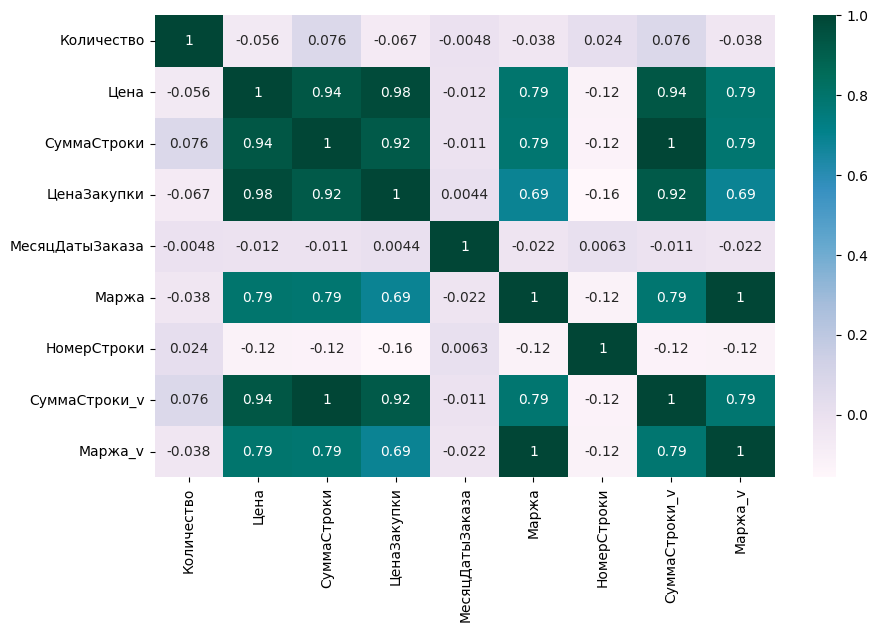

In [ ]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(df.drop(['ДеньДаты','ГодДаты','МесяцДаты','ДеньНеделиДаты','ВремяОкруглДаты'],axis=1).corr(), annot=True, cmap=colormap);

In [ ]:
# Remove unnecessary columns
df.drop(['Маржа','СуммаСтроки'],axis=1, inplace=True)

## Remove canceled positions

In [ ]:
df['Отменено'].value_counts()
df = df[df['Отменено'] == 'Нет']

Нет    532574
Да      38994
Name: Отменено, dtype: int64

In [ ]:
df['НовыйСтатус'].value_counts()

Доставлен               287230
К отгрузке              154496
Возврат из ПВЗ           58704
Частичный возврат        11658
Отменен                   7994
Принят в ПВЗ              5215
Отменяется                2788
Скомплектован Регион      2151
Расформирован ПВЗ         2019
В резерве                  287
Отправлен в ПВЗ             25
Передан в Регион             4
К отправке в Регион          3
Name: НовыйСтатус, dtype: int64

<ipython-input-34-28f8f9c28b5a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

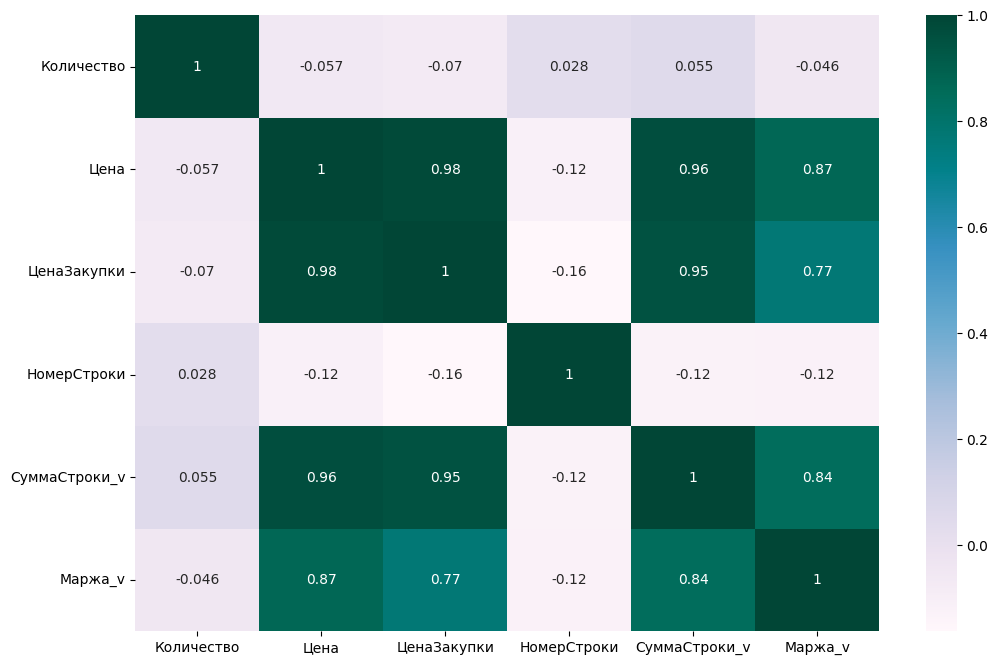

In [ ]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(df.drop(['ДеньДаты','ГодДаты','МесяцДаты', 'МесяцДатыЗаказа', 'ДеньНеделиДаты','ВремяОкруглДаты'],axis=1).corr(), annot=True, cmap=colormap)

Fill empty regions with a city of a shop




In [ ]:
# Fix region
df['Регион'] = df['Регион'].fillna(df['ГородМагазина'])
df = df[(df['Регион'] != '0')]

In [ ]:
df[df['ГородМагазина'] == '0'] 

,Дата,НомерЗаказаНаСайте,НовыйСтатус,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,Количество,Цена,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,Статус,Гео,НомерСтроки,ДатаЗаказаНаСайте,Телефон_new,ГородМагазина,МагазинЗаказа,ГодДаты,МесяцДаты,ДеньНеделиДаты,ДеньДаты,ВремяОкруглДаты,СуммаСтроки_v,Маржа_v
0,2017-05-01 00:03:00,4513479_TR,Доставлен,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,горшки,КГТ,"ТЕГА, ГОРШОК Веселая Черепаха, Польша",КГТ,Нет,1,152.0,76.00,5,2 017,Доставлен,Москва,2,2017-04-30,55574954-50515053535277,0,NaN,2017,5,1,1,00:00:00,152.0,76.00
1,2017-05-01 10:18:00,4513492_TR,К отгрузке,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),жилеты,ОДЕЖДА,"LEADER KIDS, ЖИЛЕТ Тигр, (син), р.140",МГТ,Нет,1,499.0,300.00,5,2 017,Доставлен,Москва,1,2017-04-30,55574851-50484949535070,0,NaN,2017,5,1,1,10:00:00,499.0,199.00
9,2017-05-01 15:27:00,4513472_TR,К отгрузке,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),комбинезоны,ОДЕЖДА,"MAKOMA, КОМБИНЕЗОН с капюш. My bear, р. 80, По...",МГТ,Нет,1,678.2,361.43,5,2 017,Доставлен,Москва,6,2017-04-30,55575456-53575451535378,0,NaN,2017,5,1,1,15:00:00,678.2,316.77
10,2017-05-01 15:27:00,4513472_TR,К отгрузке,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКИЕ КОЛГОТКИ И НОСКИ,носки,ОДЕЖДА,"ЗАЙКА МОЯ, НОСКИ дет., р. L",МГТ,Нет,1,89.0,38.00,5,2 017,Доставлен,Москва,8,2017-04-30,55575456-53575451535378,0,NaN,2017,5,1,1,15:00:00,89.0,51.00
11,2017-05-01 15:27:00,4513472_TR,К отгрузке,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),песочники,ОДЕЖДА,"SOFIJA, ПЕСОЧНИК Bazyl, (сер), р. 80, Польша",МГТ,Нет,1,1080.0,574.80,5,2 017,Доставлен,Москва,12,2017-04-30,55575456-53575451535378,0,NaN,2017,5,1,1,15:00:00,1080.0,505.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730550,2017-06-30 22:55:00,5031477_TR,Доставлен,Москва,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,пюре овощные,ППКП,"СЭМПЕР, ПЮРЕ цукини, с 4-х мес., (125 г)",МГТ,Нет,7,70.0,58.96,6,2 017,Доставлен,Москва,8,2017-06-30,55574857-57485151544876,0,NaN,2017,6,5,30,22:00:00,490.0,77.28
730551,2017-06-30 22:55:00,5031477_TR,Доставлен,Москва,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,пюре мясные,ППКП,"СЭМПЕР, ПЮРЕ телятина, (мономясо), с 6 мес., (...",МГТ,Нет,2,99.0,98.50,6,2 017,Доставлен,Москва,6,2017-06-30,55574857-57485151544876,0,NaN,2017,6,5,30,22:00:00,198.0,1.00
730555,2017-06-30 23:13:00,5031575_TR,К отгрузке,Санкт-Петербург,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),футболки,ОДЕЖДА,"BEMBI, ФУТБОЛКА (бел), р.128",МГТ,Нет,1,199.0,96.00,6,2 017,Доставлен,Регионы,1,2017-06-30,55575348-48504953555074,0,NaN,2017,6,5,30,23:00:00,199.0,103.00
730556,2017-06-30 23:58:00,5031783_TR,Доставлен,Нижний Новгород,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,пюре ассорти,ППКП,"ХИПП, ПЮРЕ каша груша-зерновые хлопья, с 4 мес...",МГТ,Нет,4,84.0,83.90,6,2 017,Доставлен,Регионы,2,2017-06-30,55575450-53495456535575,0,NaN,2017,6,5,30,23:00:00,336.0,0.40


Within the dataset under investigation, a multitude of location-related variables were observed, including city designations, occasionally supplemented by neighborhood-level information. In an effort to foster data balance, the decision was made to amalgamate these location attributes into broader categories aligned with the Russian federal districts. This harmonization approach was employed to address the inherent disparity stemming from the prevalence of numerous smaller cities characterized by relatively limited order frequencies. By aggregating the dataset at the level of federal districts, the aim was to mitigate potential bias arising from the uneven distribution of orders across various urban centers.

In [ ]:
df_test = df
df_test['Регион'] = df_test['Регион'].replace(['Москва', 'Белгород', 'Владимир', 'Воронеж', 'Иваново', 'Калуга', 'Кострома', 'Курск', 'Липецк', 'Люберцы', 'Мытищи', 
                                     'Подольск', 'Рязань', 'Сергиев Посад', 'Серпухов', 'Смоленск', 'Тамбов', 'Тверь', 'Тула', 'Ярославль'
                                     ], 'Центральный ф.о.')
df_test['Регион'] = df_test['Регион'].replace(['Великий Новгород', 'Вологда', 'Воркута', 'Всеволожск', 'Выборг', 'Гатчина', 'Кингисепп', 'Кириши', 'Колпино', 'Мурманск', 
                                     'Петрозаводск', 'Псков', 'Пушкин', 'Санкт-Петербург', 'Тихвин', 'Череповец'], 'Северо-Западный ф.о.')
df_test['Регион'] = df_test['Регион'].replace(['Ижевск', 'Казань', 'Набережные Челны', 'Нижний Новгород', 'Новокуйбышевск', 'Пенза', 'Пермь', 'Самара', 'Саратов', 
                                     'Тольятти', 'Ульяновск', 'Уфа', 'Чебоксары'], 'Приволжский ф.о.')
df_test['Регион'] = df_test['Регион'].replace(['Барнаул', 'Горно-Алтайск', 'Иркутск', 'Кемерово', 'Красноярск', 'Новокузнецк', 'Новосибирск', 'Омск', 'Томск', 
                                               'Барнаул', "Бийск", "Рубцовск", "Новоалтайск"], 'Сибирский ф.о.')
df_test['Регион'] = df_test['Регион'].replace(['Волгоград', 'Краснодар', 'Новочеркасск', 'Пятигорск', 'Ростов-на-Дону', 'Сочи', 'Ставрополь'], 'Южный ф.о.')
df_test['Регион'] = df_test['Регион'].replace(['Екатеринбург', 'Нижневартовск', 'Нижний Тагил', 'Ноябрьск', 'Сургут', 'Тюмень', 'Челябинск'], 'Уральский ф.о.')
df_test['Регион'] = df_test['Регион'].replace({'Владивосток': 'Дальневосточный ф.о.'})

df_test['Регион'] = df_test['Регион'].replace({
    'Красногорск (Красногорский район)': 'Центральный ф.о.',
    'Коломна (Московская область район)': 'Центральный ф.о.',
    'Серпухов (Московская область район)': 'Центральный ф.о.',
    'Ступино (Ступинский район)': 'Центральный ф.о.',
    'Черкесск': 'Южный ф.о.',
    'Клин (Клинский район)': 'Центральный ф.о.',
    'Сергиев Посад (Сергиево-Посадский район)': 'Центральный ф.о.',
    'Геленджик': 'Южный ф.о.',
    'Подольск (Московская область район)': 'Центральный ф.о.',
    'Люберцы (Люберецкий район)': 'Центральный ф.о.',
    'Волжский': 'Южный ф.о.',
    'Дубна (Московская область район)': 'Центральный ф.о.',
    'Волоколамск (Волоколамский район)': 'Центральный ф.о.',
    'Орск': 'Южный ф.о.',
    'Краснокаменск': 'Сибирский ф.о.',
    'Одинцово (Одинцовский район)': 'Центральный ф.о.',
    'Жуковский (Московская область район)': 'Центральный ф.о.',
    'Внуково (Волоколамский район)': 'Центральный ф.о.',
    'Орёл': 'Центральный ф.о.',
    'Йошкар-Ола': 'Приволжский ф.о.',
    'Старый Оскол': 'Центральный ф.о.',
    'Тобольск': 'Уральский ф.о.',
    'Мытищи (Мытищинский район)': 'Центральный ф.о.',
    'Новомосковск': 'Центральный ф.о.',
    'Котельники (Люберецкий район)': 'Центральный ф.о.',
    'Раменское (Раменский район)': 'Центральный ф.о.',
    'Архангельск': 'Северо-Западный ф.о.',
    'Коммунарка (Ленинский район)': 'Центральный ф.о.'})
       
df_test['Регион'] = df_test['Регион'].replace({
    'Астрахань': 'Южный ф.о.',
    'Новое Подвязново (Ногинский район)': 'Центральный ф.о.',
    'Павловский Посад (Павлово-Посадский район)': 'Центральный ф.о.',
    'Королев (Московская область район)': 'Центральный ф.о.',
    'Балашиха (Балашихинский район)': 'Центральный ф.о.',
    'Селятино (Наро-Фоминский район)': 'Центральный ф.о.',
    'Старая Купавна (Ногинский район)': 'Центральный ф.о.',
    'Оренбург': 'Приволжский ф.о.',
    'Чита': 'Сибирский ф.о.',
    'Железнодорожный (Московская область район)': 'Центральный ф.о.',
    'Ногинск (Ногинский район)': 'Центральный ф.о.',
    'Воскресенск (Воскресенский район)': 'Центральный ф.о.',
    'Балаково': 'Южный ф.о.',
    'Дзержинский (Московская область район)': 'Центральный ф.о.',
    'Севастополь': 'Южный ф.о.',
    'Истра (Истринский район)': 'Центральный ф.о.',
    'Киров': 'Приволжский ф.о.',
    'Электросталь (Московская область район)': 'Центральный ф.о.',
    'Пушкино (Пушкинский район)': 'Центральный ф.о.',
    'Долгопрудный (Московская область район)': 'Центральный ф.о.',
    'Видное (Ленинский район)': 'Центральный ф.о.',
    'Орехово-Зуево (Московская область район)': 'Центральный ф.о.',
    'Томилино (Люберецкий район)': 'Центральный ф.о.',
    'Стерлитамак': 'Приволжский ф.о.',
    'Реутов (Московская область район)': 'Центральный ф.о.',
    'Химки (Московская область район)': 'Центральный ф.о.'})


df_test['Регион'] = df_test['Регион'].replace({
    'Щербинка (Московская область район)': 'Центральный ф.о.',
    'Дзержинск': 'Приволжский ф.о.',
    'Благовещенск': 'Дальневосточный ф.о.',
    'Домодедово (Домодедовский район)': 'Центральный ф.о.',
    'Дмитров (Дмитровский район)': 'Центральный ф.о.',
    'Таганрог': 'Южный ф.о.',
    'Брянск': 'Центральный ф.о.',
    'Ковров': 'Центральный ф.о.',
    'Кожухово (Люберецкий район)': 'Центральный ф.о.',
    'Хабаровск': 'Дальневосточный ф.о.',
    'Солнечногорск (Солнечногорский район)': 'Центральный ф.о.',
    'Путилково (Красногорский район)': 'Центральный ф.о.',
    'Мосрентген (Ленинский район)': 'Центральный ф.о.',
    'Добрянка': 'Приволжский ф.о.',
    'Михайловск': 'Приволжский ф.о.',
    'Лобня (Московская область район)': 'Центральный ф.о.',
    'Троицк (ГП Москва)': 'Центральный ф.о.',
    'Щелково (Щелковский район)': 'Центральный ф.о.',
    'Чулково (Раменский район)': 'Центральный ф.о.',
    'Можайск (Можайский район)': 'Центральный ф.о.',
    'Шатура (Шатурский район)': 'Центральный ф.о.',
    'Улан-Удэ': 'Сибирский ф.о.',
    'Волгодонск': 'Южный ф.о.',
    'Салтыковка (Балашихинский район)': 'Центральный ф.о.',
    'Юбилейный (Московская область район)': 'Центральный ф.о.',
    'Голицыно (Одинцовский район)': 'Центральный ф.о.',
    'Каменск-Уральский': 'Уральский ф.о.',
    'Митино (Волоколамский район)': 'Центральный ф.о.'})
       
df_test['Регион'] = df_test['Регион'].replace({
    'Луховицы (Луховицкий район)': 'Центральный ф.о.',
    'Купавна (Талдомский район)': 'Центральный ф.о.',
    'Кандалакша': 'Северо-Западный ф.о.',
    'Ивантеевка (Московская область район)': 'Центральный ф.о.',
    'Саранск': 'Приволжский ф.о.',
    'Софрино (Пушкинский район)': 'Центральный ф.о.',
    'Ухта': 'Северный ф.о.',
    'Немчиновка (Одинцовский район)': 'Центральный ф.о.',
    'Симферополь': 'Южный ф.о.',
    'Новороссийск': 'Южный ф.о.',
    'Армавир': 'Южный ф.о.',
    'Дрожжино (Ленинский район)': 'Центральный ф.о.',
    'Нахабино (Красногорский район)': 'Центральный ф.о.',
    'Боровск': 'Центральный ф.о.',
    'Якутск': 'Дальневосточный ф.о.',
    'Электрогорск (Павлово-Посадский район)': 'Центральный ф.о.',
    'Обнинск': 'Центральный ф.о.',
    'Димитровград': 'Приволжский ф.о.',
    'Глазов': 'Приволжский ф.о.',
    'Сызрань': 'Приволжский ф.о.',
    'Звенигород (Московская область район)': 'Центральный ф.о.',
    'Чехов (Чеховский район)': 'Центральный ф.о.',
    'Руза (Рузский район)': 'Центральный ф.о.',
    'Миасс': 'Уральский ф.о.',
    'Наро-Фоминск (Наро-Фоминский район)': 'Центральный ф.о.'
})


df_test['Регион'] = df_test['Регион'].replace({
    'Магадан': 'Дальневосточный ф.о.',
    'Усинск': 'Северо-Западный ф.о.',
    'Новопокровская (Краснодарский край)': 'Южный ф.о.',
    'Электроугли (Ногинский район)': 'Центральный ф.о.',
    'Красково (Люберецкий район)': 'Центральный ф.о.',
    'Адлер': 'Южный ф.о.',
    'Рассказово': 'Центральный ф.о.',
    'Ознобишино (Подольский район)': 'Центральный ф.о.',
    'Владикавказ': 'Северо-Кавказский ф.о.',
    'Железноводск': 'Северо-Кавказский ф.о.',
    'Серебряные Пруды (Серебряно-Прудский район)': 'Центральный ф.о.',
    'Анапа': 'Южный ф.о.',
    'Бутово (Ленинский район)': 'Центральный ф.о.',
    'Знамя Октября (Подольский район)': 'Центральный ф.о.',
    'Калининград': 'Северо-Западный ф.о.',
    'Лангепас': 'Уральский ф.о.',
    'Шахты': 'Южный ф.о.',
    'Лосино-Петровский (Щелковский район)': 'Центральный ф.о.',
    'Малаховка (Люберецкий район)': 'Центральный ф.о.',
    'Норильск': 'Сибирский ф.о.',
    'Махачкала': 'Северо-Кавказский ф.о.'
})

       
       
       
       
df_test['Регион'] = df_test['Регион'].replace({
    'Галич': 'Центральный ф.о.',
    'Нефтеюганск': 'Уральский ф.о.',
    'Биокомбината (Щелковский район)': 'Центральный ф.о.',
    'Кирово-Чепецк': 'Приволжский ф.о.',
    'Софьино (Раменский район)': 'Центральный ф.о.',
    'Лыткарино (Московская область район)': 'Центральный ф.о.',
    'Пирогово (Мытищинский район)': 'Центральный ф.о.',
    'Боровичи': 'Северо-Западный ф.о.',
    'Апрелевка (Наро-Фоминский район)': 'Центральный ф.о.',
    'Алапаевск': 'Уральский ф.о.',
    'Петропавловск-Камчатский': 'Дальневосточный ф.о.',
    'Муром': 'Центральный ф.о.',
    'Касимов': 'Центральный ф.о.',
    'Свердловский (Щелковский район)': 'Центральный ф.о.',
    'Краснознаменск (Московская область район)': 'Центральный ф.о.',
    'Ханты-Мансийск': 'Уральский ф.о.',
    'Невинномысск': 'Северо-Кавказский ф.о.',
    'Ильский (Краснодарская область)': 'Южный ф.о.',
    'Грозный': 'Северо-Кавказский ф.о.'
})

df_test['Регион'] = df_test['Регион'].replace({
    'Южно-Сахалинск': 'Дальневосточный ф.о.',
    'Сарапул': 'Приволжский ф.о.',
    'Березники': 'Приволжский ф.о.',
    'Полысаево': 'Сибирский ф.о.',
    'Бронницы (Московская область район)': 'Центральный ф.о.',
    'Солманово (Одинцовский район)': 'Центральный ф.о.',
    'Егорьевск (Егорьевский район)': 'Центральный ф.о.',
    'Марусино (Люберецкий район)': 'Центральный ф.о.',
    'Монино (Щелковский район)': 'Центральный ф.о.',
    'Ессентукская (Ставропольский край)': 'Северо-Кавказский ф.о.',
    'Мытищи 16 (Мытищинский район)': 'Центральный ф.о.',
    'Печора': 'Северо-Западный ф.о.',
    'Рыбинск': 'Центральный ф.о.',
    'Успенское (Одинцовский район)': 'Центральный ф.о.',
    'Барвиха (Одинцовский район)': 'Центральный ф.о.',
    'Сатка': 'Уральский ф.о.',
    'Дедовск (Истринский район)': 'Центральный ф.о.',
    'Кубинка (Одинцовский район)': 'Центральный ф.о.',
    'Тимашёвск': 'Южный ф.о.',
    'Копейск': 'Уральский ф.о.',
    'Куровское (Орехово-Зуевский район)': 'Центральный ф.о.',
    'Крымск': 'Южный ф.о.',
    'Люберцы-2 (Люберецкий район)': 'Центральный ф.о.',
    'Зеленоград': 'Центральный ф.о.',
    'Сыктывкар': 'Северо-Западный ф.о.',
    'Гуково': 'Южный ф.о.',
    'Баковка (Одинцовский район)': 'Центральный ф.о.',
    'Совхоз им Ленина (Ленинский район)': 'Центральный ф.о.',
    'Правдинский (Пушкинский район)': 'Центральный ф.о.'})



df_test['Регион'] = df_test['Регион'].replace({
    'Чиверево (Мытищинский район)': 'Центральный ф.о.',
    'Архангельское (Красногорский район)': 'Центральный ф.о.',
    'Суханово (Ленинский район)': 'Центральный ф.о.',
    'Демихово (Демиховское с/п) (Орехово-Зуевский район)': 'Центральный ф.о.',
    'Нальчик': 'Северо-Кавказский ф.о.',
    'Пироговский (Мытищинский район)': 'Центральный ф.о.',
    'Туапсе': 'Южный ф.о.',
    'ВНИИССОК (Одинцовский район)': 'Центральный ф.о.',
    'Московский (Ленинский район)': 'Центральный ф.о.',
    'Костомукша': 'Северо-Западный ф.о.',
    'Брехово (Солнечногорский район)': 'Центральный ф.о.',
    'Зеленокумск': 'Северо-Кавказский ф.о.',
    'Булатниково (Ленинский район)': 'Центральный ф.о.',
    'Ерино (Подольский район)': 'Центральный ф.о.'
})



df_test['Регион'] = df_test['Регион'].replace({
    'Сосенки (Ленинский район)': 'Центральный ф.о.',
    'Североморск': 'Северо-Западный ф.о.',
    'Кашира (Каширский район)': 'Центральный ф.о.',
    'Сухой Лог': 'Уральский ф.о.',
    'Торжок': 'Центральный ф.о.',
    'Чапаевск': 'Приволжский ф.о.',
    'Ессентуки': 'Северо-Кавказский ф.о.',
    'Элиста': 'Южный ф.о.',
    'Каспийск': 'Южный ф.о.',
    'Заречье (Одинцовский район)': 'Центральный ф.о.',
    'Азов': 'Южный ф.о.',
    'Новошахтинск': 'Южный ф.о.',
    'Новинки (Истринский район)': 'Центральный ф.о.',
    'Истра (Красногорский район)': 'Центральный ф.о.',
    'Молоково (Ленинский район)': 'Центральный ф.о.',
    'Новоивановское (Одинцовский район)': 'Центральный ф.о.',
    'Александровка (Красногорский район)': 'Центральный ф.о.',
    'Мотяково (Люберецкий район)': 'Центральный ф.о.',
    'Елизово': 'Дальневосточный ф.о.',
    'Захарково (Красногорский район)': 'Центральный ф.о.',
    'Силикат (Люберецкий район)': 'Центральный ф.о.',
    'Веледниково (Истринский район)': 'Центральный ф.о.',
    'Давыдово (Давыдовское с/п) (Орехово-Зуевский район)': 'Центральный ф.о.',
    'Вялки (Раменский район)': 'Центральный ф.о.',
    'Боброво (Ленинский район)': 'Центральный ф.о.',
    'Заря (Балашихинский район)': 'Центральный ф.о.',
    'Кстово': 'Приволжский ф.о.',
    'Клязьма (Пушкинский район)': 'Центральный ф.о.'
})



df_test['Регион'] = df_test['Регион'].replace({
    'Протвино (Московская область район)': 'Центральный ф.о.',
    'Бузулук': 'Приволжский ф.о.',
    'Озеры (Озерский район)': 'Центральный ф.о.',
    'Тихорецк': 'Южный ф.о.',
    'Павловская (Краснодарский край)': 'Южный ф.о.',
    'Яблоновский': 'Южный ф.о.',
    'Птичное (Наро-Фоминский район)': 'Центральный ф.о.',
    'Ейск': 'Южный ф.о.',
    'Рождествено (Истринский район)': 'Центральный ф.о.',
    'Воскресенское (Каширский район)': 'Центральный ф.о.',
    'Овражки (Люберецкий район)': 'Центральный ф.о.',
    'Георгиевск': 'Северо-Кавказский ф.о.',
    'Среднеуральск': 'Уральский ф.о.',
    'Грайворон': 'Центральный ф.о.',
    'Братск': 'Сибирский ф.о.',
    'Альметьевск': 'Приволжский ф.о.',
    'Новый Уренгой': 'Дальневосточный ф.о.',
    'Вязьма': 'Центральный ф.о.',
    'Михнево (Домодедовский район)': 'Центральный ф.о.',
    'Белово': 'Сибирский ф.о.',
    'Лунево (Солнечногорский район)': 'Центральный ф.о.',
    'Калач-на-Дону': 'Южный ф.о.',
    'Михнево (Ступинский район)': 'Центральный ф.о.',
    'Городище': 'Центральный ф.о.',
    'Ромашково (Одинцовский район)': 'Центральный ф.о.',
    'Полтево (Балашихинский район)': 'Центральный ф.о.',
    'Кисловодск': 'Северо-Кавказский ф.о.',
    '1 Мая (Балашихинский район)': 'Центральный ф.о.',
    'Новоуральск': 'Уральский ф.о.',
    'Борисоглебск': 'Центральный ф.о.',
    'Ачинск': 'Сибирский ф.о.',
    'Волжск': 'Приволжский ф.о.',
    'Тосно': 'Северо-Западный ф.о.',
    'Гулькевичи': 'Южный ф.о.',
    'Верхняя Салда': 'Уральский ф.о.',
    'Энгельс': 'Приволжский ф.о.',
    'Климовск (Московская область район)': 'Центральный ф.о.',
    'Первоуральск': 'Уральский ф.о.',
    'Новокубанск': 'Южный ф.о.',
    'Гаврилов-Ям': 'Центральный ф.о.',
    'Серов': 'Уральский ф.о.',
    'Светлоград': 'Южный ф.о.',
    'Кунгур': 'Приволжский ф.о.',
    'Абакан': 'Сибирский ф.о.'
})

df_test['Регион'] = df_test['Регион'].replace({
    'Фрязино (Московская область район)': 'Центральный ф.о.',
    'Лебедянь': 'Центральный ф.о.',
    'Елец': 'Центральный ф.о.',
    'Россошь': 'Центральный ф.о.',
    'Ликино-Дулево (Орехово-Зуевский район)': 'Центральный ф.о.',
    'Снегири (Истринский район)': 'Центральный ф.о.',
    'Нововоронеж': 'Центральный ф.о.',
    'Ленинск-Кузнецкий': 'Сибирский ф.о.',
    'Троицк (Челябинская область)': 'Уральский ф.о.',
    'Апатиты': 'Северо-Западный ф.о.',
    'Березовский (Свердловская область)': 'Уральский ф.о.',
    'Спасск-Дальний': 'Дальневосточный ф.о.',
    'Черноголовка (Ногинский район)': 'Центральный ф.о.',
    'Арзамас': 'Приволжский ф.о.',
    'Саларьево (Ленинский район)': 'Центральный ф.о.',
    'Салават': 'Приволжский ф.о.',
    'Часовня (Люберецкий район)': 'Центральный ф.о.',
    'Лесной': 'Уральский ф.о.',
    'Дроздово (Ленинский район)': 'Центральный ф.о.',
    'Сосновый Бор': 'Северо-Западный ф.о.',
    'Красный Сулин': 'Южный ф.о.',
    'Аксай': 'Южный ф.о.',
    'Прокопьевск': 'Сибирский ф.о.',
    'Развилка (Ленинский район)': 'Центральный ф.о.',
    'Ржев': 'Центральный ф.о.',
    'Партизанск': 'Дальневосточный ф.о.',
    'Майский': 'Приволжский ф.о.',
    'Павловск (Воронежская обл.)': 'Центральный ф.о.',
    'Виноградово (Воскресенский район)': 'Центральный ф.о.',
    'Камышин': 'Южный ф.о.',
    'Приволжск': 'Приволжский ф.о.',
    'Федюково (Подольский район)': 'Центральный ф.о.',
    'Магнитогорск': 'Уральский ф.о.',
    'Кинель': 'Приволжский ф.о.',
    'Мелеуз': 'Приволжский ф.о.',
    'Соликамск': 'Приволжский ф.о.',
    'Полевской': 'Уральский ф.о.',
    'Глухово (Красногорский район)': 'Центральный ф.о.'
})


df_test['Регион'] = df_test['Регион'].replace({
    'Великие Луки': 'Северо-Западный ф.о.',
    'Вешки (Мытищинский район)': 'Центральный ф.о.',
    'Каневская (Краснодарский край)': 'Южный ф.о.',
    'Белоозерский (Воскресенский район)': 'Центральный ф.о.',
    'Кореновск': 'Южный ф.о.',
    'Островцы (Раменский район)': 'Центральный ф.о.',
    'Батайск': 'Южный ф.о.',
    'Петрово-Дальнее (Красногорский район)': 'Центральный ф.о.',
    'Переславль-Залесский': 'Центральный ф.о.',
    'Мыски': 'Сибирский ф.о.',
    'Фурманов': 'Центральный ф.о.',
    'Октябрьский': 'Приволжский ф.о.',
    'Майкоп': 'Южный ф.о.',
    'Юрьевец': 'Центральный ф.о.',
    'Александров': 'Центральный ф.о.',
    'Усть-Илимск': 'Сибирский ф.о.',
    'Ильинское (Красногорский район)': 'Центральный ф.о.',
    'Белореченск': 'Южный ф.о.',
    'Отрадное': 'Северо-Западный ф.о.',
    'Сальск': 'Южный ф.о.',
    'Щёкино': 'Центральный ф.о.',
    'Северодвинск': 'Северо-Западный ф.о.',
    'Сковородино': 'Дальневосточный ф.о.',
    'Балахна': 'Приволжский ф.о.',
    'Красноармейск (Московская область район)': 'Центральный ф.о.',
    'Мичуринск': 'Центральный ф.о.',
    'Уссурийск': 'Дальневосточный ф.о.',
    'Саяногорск': 'Сибирский ф.о.',
    'Икша (Дмитровский район)': 'Центральный ф.о.',
    'Ватутинки (Ленинский район)': 'Центральный ф.о.'
})

       
df_test['Регион'] = df_test['Регион'].replace({
    'Городец': 'Приволжский ф.о.',
    'Калининец (Наро-Фоминский район)': 'Центральный ф.о.',
    'Картино (Ленинский район)': 'Центральный ф.о.',
    'Горки Ленинские (Домодедовский район)': 'Центральный ф.о.',
    'Подольсклесхоз (Подольский район)': 'Центральный ф.о.',
    'Раменки (Егорьевский район)': 'Центральный ф.о.',
    'Володарского (Ленинский район)': 'Центральный ф.о.',
    'Можга': 'Приволжский ф.о.',
    'Яхрома (Дмитровский район)': 'Центральный ф.о.',
    'Жирновск': 'Южный ф.о.',
    'Черкизово (Пушкинский район)': 'Центральный ф.о.',
    'Бердск': 'Сибирский ф.о.',
    'Горячий Ключ': 'Южный ф.о.',
    'Полярные Зори': 'Северо-Западный ф.о.',
    'Лиски': 'Центральный ф.о.',
    'Железногорск': 'Сибирский ф.о.',
    'Столбовая (Чеховский район)': 'Центральный ф.о.',
    'Сапроново (Ленинский район)': 'Центральный ф.о.',
    'Павлово (Нижегородская область)': 'Приволжский ф.о.',
    'Быково (Подольский район)': 'Центральный ф.о.',
    'Североуральск': 'Уральский ф.о.',
    'Углич': 'Центральный ф.о.',
    'Борзя': 'Дальневосточный ф.о.',
    'Талдом (Талдомский район)': 'Центральный ф.о.',
    'Красноуфимск': 'Уральский ф.о.',
    'Нижнекамск': 'Приволжский ф.о.',
    'Удельная (Раменский район)': 'Центральный ф.о.',
    'Киевский (Наро-Фоминский район)': 'Центральный ф.о.',
    'Дрезна-2 (Горбачихинский с/о) (Орехово-Зуевский район)': 'Центральный ф.о.',
    'Мечникова (Красногорский район)': 'Центральный ф.о.',
    'Котельниково': 'Южный ф.о.',
    'Канск': 'Сибирский ф.о.',
    'Малоярославец': 'Центральный ф.о.',
    'Златоуст': 'Уральский ф.о.',
    'Константиново (Раменский район)': 'Центральный ф.о.',
    'Кыштым': 'Уральский ф.о.',
    'Гай': 'Приволжский ф.о.',
    'Котлас': 'Северо-Западный ф.о.',
    'Будённовск': 'Южный ф.о.',
    'Марьино (Ленинский район)': 'Центральный ф.о.',
    'Пыть-Ях': 'Сибирский ф.о.',
    'Нефтекамск': 'Приволжский ф.о.',
    'Минеральные Воды': 'Южный ф.о.',
    'Лермонтов': 'Южный ф.о.',
    'Бугульма': 'Приволжский ф.о.',
    'Чусовой': 'Приволжский ф.о.'
})

df_test['Регион'] = df_test['Регион'].replace({
    'Жостово (Мытищинский район)': 'Центральный ф.о.',
    'Малые Вяземы (Одинцовский район)': 'Центральный ф.о.',
    'Кировск (Ленинградская область)': 'Северо-Западный ф.о.',
    'Новоглаголево (Наро-Фоминский район)': 'Центральный ф.о.',
    'Балашов': 'Приволжский ф.о.',
    'Нерехта': 'Центральный ф.о.',
    'Кратово (Раменский район)': 'Центральный ф.о.',
    'Мисайлово (Ленинский район)': 'Центральный ф.о.',
    'Усово-Тупик (Одинцовский район)': 'Центральный ф.о.',
    'Куркино (Шаховской район)': 'Центральный ф.о.',
    'Грязи': 'Центральный ф.о.',
    'Губкин': 'Центральный ф.о.',
    'Белая Калитва': 'Южный ф.о.',
    'Кольчугино': 'Центральный ф.о.',
    'Славянск-на-Кубани': 'Южный ф.о.',
    'Минусинск': 'Сибирский ф.о.',
    'Усть-Кут': 'Сибирский ф.о.',
    'Выкса': 'Приволжский ф.о.',
    'Оса': 'Приволжский ф.о.',
    'Ряжск': 'Центральный ф.о.',
    'Ногинск-9 (Ногинский район)': 'Центральный ф.о.',
    'Грибки (Мытищинский район)': 'Центральный ф.о.',
    'Балобаново (Ногинский район)': 'Центральный ф.о.',
    'Ангелово (Красногорский район)': 'Центральный ф.о.',
    'Рошаль (Московская область район)': 'Центральный ф.о.',
    'Лесные Поляны (Пушкинский район)': 'Центральный ф.о.',
    'Новотроицк': 'Уральский ф.о.',
    'Ногинск-5 (Ногинский район)': 'Центральный ф.о.',
    'Кола': 'Северо-Западный ф.о.',
    'Курганинск': 'Южный ф.о.',
    'Карпово (Раменский район)': 'Центральный ф.о.',
    'Остров': 'Северо-Западный ф.о.',
    'Авиационный (Домодедовский район)': 'Центральный ф.о.',
    'Адыгейск': 'Южный ф.о.',
    'Ангарск': 'Сибирский ф.о.'
})



df_test['Регион'] = df_test['Регион'].replace({
    'Ховрино (Мытищинский район)': 'Центральный ф.о.',
    'Щемилово (Ногинский район)': 'Центральный ф.о.',
    'Бокситогорск': 'Северо-Западный ф.о.',
    'Погорелки (Мытищинский район)': 'Центральный ф.о.',
    'Старощербиновская (Краснодарский край)': 'Южный ф.о.',
    'Богородицк': 'Центральный ф.о.',
    'Новосельцево (Мытищинский район)': 'Центральный ф.о.',
    'Химки': 'Центральный ф.о.',
    'Грибаново (Красногорский район)': 'Центральный ф.о.',
    'Быково (Раменский район)': 'Центральный ф.о.',
    'Троицкое (Мытищинский район)': 'Центральный ф.о.',
    'Мартемьяново (Наро-Фоминский район)': 'Центральный ф.о.',
    'Усть-Лабинск': 'Южный ф.о.',
    'Ясногорск': 'Центральный ф.о.',
    'Реутов': 'Центральный ф.о.',
    'Кузнецк': 'Приволжский ф.о.',
    'Долгопрудный': 'Центральный ф.о.',
    'Королев': 'Центральный ф.о.',
    'Коломна-1 (Коломенский район)': 'Центральный ф.о.',
    'Румянцево (Истринский район)': 'Центральный ф.о.',
    'Алабушево (Солнечногорский район)': 'Центральный ф.о.',
    'Енисейск': 'Сибирский ф.о.',
    'Тучково СТ (Рузский район)': 'Центральный ф.о.',
    'Заречный (Свердловская область)': 'Уральский ф.о.',
    'Ульянково (Мытищинский район)': 'Центральный ф.о.',
    'Северск': 'Сибирский ф.о.',
    'Юрга': 'Сибирский ф.о.',
    'Новодрожжино (Ленинский район)': 'Центральный ф.о.',
    'Белоярский': 'Сибирский ф.о.',
    'Мильково (Ленинский район)': 'Центральный ф.о.',
    'Поярково (Солнечногорский район)': 'Центральный ф.о.',
    'Муриково (Шаховской район)': 'Центральный ф.о.'
})

df_test['Регион'] = df_test['Регион'].replace({
    'Старый': 'Центральный ф.о.',
    'Жуковский': 'Центральный ф.о.',
    'Нижний': 'Приволжский ф.о.',
    'Орехово-Зуево': 'Центральный ф.о.',
    'Орел': 'Центральный ф.о.',
    'Красногорск': 'Центральный ф.о.',
    'Ногинск': 'Центральный ф.о.',
    'Дубна': 'Центральный ф.о.',
    'Северный ф.о.': 'Северо-Западный ф.о.',
    'Железнодорожный': 'Центральный ф.о.',
    'Павловский': 'Центральный ф.о.',
    'Клин': 'Центральный ф.о.',
    'Набережные': 'Приволжский ф.о.',
    'Электросталь': 'Центральный ф.о.',
    'Сергиев': 'Центральный ф.о.',
    'Коломна': 'Центральный ф.о.'
})


In [ ]:
df_test['Регион'].value_counts()

Центральный ф.о.          347881
Приволжский ф.о.           62589
Северо-Западный ф.о.       35884
Южный ф.о.                 31655
Сибирский ф.о.             26412
Уральский ф.о.             22404
Дальневосточный ф.о.        5522
Северо-Кавказский ф.о.       227
Name: Регион, dtype: int64

In [ ]:
px.pie(value_counts_to_df(df_test['Регион']) , values='count', names='category',
             color_discrete_sequence=colors).show()

In [ ]:
df = df_test

Delivered orders

In [ ]:
df['Статус'].value_counts()

Доставлен       441726
Возврат          70362
Отменен          10013
В процессе        7682
Не определен      2791
Name: Статус, dtype: int64

In [ ]:
px.pie(value_counts_to_df(df['Статус']) , values='count', names='category',
             color_discrete_sequence=colors).show()

In [ ]:
df['НовыйСтатус'].value_counts()
df = df[df['НовыйСтатус'] !='Отменяется']

Доставлен               287230
К отгрузке              154496
Возврат из ПВЗ           58704
Частичный возврат        11658
Отменен                   7994
Принят в ПВЗ              5215
Отменяется                2788
Скомплектован Регион      2151
Расформирован ПВЗ         2019
В резерве                  287
Отправлен в ПВЗ             25
Передан в Регион             4
К отправке в Регион          3
Name: НовыйСтатус, dtype: int64

In [ ]:
px.pie(value_counts_to_df(df['НовыйСтатус']), values='count', names='category',
             color_discrete_sequence=colors).show()

Save the datasets

In [ ]:
# Save the whole dataset without canceled items
df = df.reset_index()
df.to_csv('dataset_clean.csv',encoding='utf-8',index=False)

# Save the subset of the dataset of positions that were purchased 
df_delivered = df[df['Статус']=='Доставлен']
df_delivered = df_delivered.reset_index()
df_delivered.to_csv('dataset_delivered.csv',encoding='utf-8',index=False)

# Save the subset with filled phones
df_w_phones = df[~df['Телефон_new'].isna()]
df_w_phones = df_w_phones.reset_index()
df_w_phones.to_csv('dataset_phones.csv',encoding='utf-8',index=False)

In [ ]:
df.describe()

,index,Количество,Цена,ЦенаЗакупки,МесяцДатыЗаказа,НомерСтроки,ГодДаты,МесяцДаты,ДеньНеделиДаты,ДеньДаты,СуммаСтроки_v,Маржа_v
count,529786.000000,529786.000000,529786.000000,432913.000000,529786.000000,529786.000000,529786.0,529786.000000,529786.000000,529786.000000,529786.000000,432913.000000
mean,369070.331587,1.464021,666.619680,608.118675,5.478235,4.890611,2017.0,5.478235,3.689512,16.664104,759.887468,182.217738
std,213246.802600,1.956677,1938.279494,1583.754438,0.499527,6.964102,0.0,0.499527,1.834653,8.586484,2021.136294,640.618308
min,0.000000,1.000000,1.000000,0.550000,5.000000,1.000000,2017.0,5.000000,1.000000,1.000000,1.000000,-29100.000000
25%,185959.250000,1.000000,85.000000,69.660000,5.000000,1.000000,2017.0,5.000000,2.000000,9.000000,99.000000,11.000000
50%,365964.500000,1.000000,187.400000,185.000000,5.000000,2.000000,2017.0,5.000000,3.000000,17.000000,227.000000,46.100000
75%,556575.500000,1.000000,560.000000,563.730000,6.000000,6.000000,2017.0,6.000000,5.000000,24.000000,620.000000,143.030000
max,730557.000000,150.000000,71200.000000,56950.000000,6.000000,137.000000,2017.0,6.000000,7.000000,31.000000,71200.000000,26000.000000


In [ ]:
df_delivered['Регион'].value_counts()

Центральный ф.о.          290780
Приволжский ф.о.           54198
Северо-Западный ф.о.       28546
Южный ф.о.                 24694
Сибирский ф.о.             20746
Уральский ф.о.             18062
Дальневосточный ф.о.        4490
Северо-Кавказский ф.о.       210
Name: Регион, dtype: int64

In [ ]:
# compress the data
!zip -r /content/dataset_clean.zip /content/dataset_clean.csv
!zip -r /content/dataset_delivered.zip /content/dataset_delivered.csv
!zip -r /content/dataset_phones.zip /content/dataset_phones.csv


  adding: content/dataset_clean.csv (deflated 85%)
  adding: content/dataset_delivered.csv (deflated 84%)
  adding: content/dataset_phones.csv (deflated 84%)


In [ ]:
!ls -lth

total 909M
-rw-r--r-- 1 root root  32M Jun 10 18:35  dataset_phones.zip
-rw-r--r-- 1 root root  27M Jun 10 18:35  dataset_delivered.zip
-rw-r--r-- 1 root root  30M Jun 10 18:35  dataset_clean.zip
-rw-r--r-- 1 root root 197M Jun 10 18:34  dataset_phones.csv
-rw-r--r-- 1 root root 166M Jun 10 18:34  dataset_delivered.csv
-rw-r--r-- 1 root root 194M Jun 10 18:34  dataset_clean.csv
-rw-r--r-- 1 root root  23M Jun 10 18:33  05_06_17_VSE.rar
drwxr-xr-x 1 root root 4.0K Jun  8 18:18  sample_data
-rw-r--r-- 1 root root 243M Apr 30  2019 '!05&06_17_VSE.csv'
